In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Source and Quality
The data used in this analysis is sourced from [Data.gov](https://catalog.data.gov/dataset/automobile-insurance-company-complaint-rankings-beginning-2009).
This dataset provides information on automobile insurance company complaint rankings starting from 2009.

The New York State Department of Financial Services (DFS) ranks automobile insurance companies doing
business in New York State based on the number of consumer complaints upheld against them as a
percentage of their total business over a two-year period. Complaints typically involve issues like delays
in the payment of no-fault claims and nonrenewal of policies. Insurers with the fewest upheld
complaints per million dollars of premiums appear at the top of the list. Those with the highest
complaint ratios are ranked at the bottom.
The Automobile Insurance Company Ranking is designed to provide a point of reference consumers may
wish to consider when buying insurance coverage. The Owner’s Resource Center on the DFS website,
https://www.dfs.ny.gov/consumer/cauto.htm, contains additional information consumers may find
helpful, including how to file complaints with DFS, how to shop for insurance and how to save money
when buying insurance.



This ranking includes only complaints received by DFS. It does not include complaints sent only to
insurance companies. Upheld complaints occur when DFS agrees with a consumer that an auto insurer
made an inappropriate decision. Complaints not upheld by DFS or withdrawn by the consumer are not
included in the final calculation. Large insurance companies doing a lot of business typically generate
more complaints than smaller companies, so while ratios may allow you to compare small companies
with large companies by looking at complaints as a percentage of premiums written, only one or two
additional upheld complaints per year can have a significant impact on a smaller insurer.

In [2]:
insurance_data=pd.read_csv("Automobile_Insurance_Company_Complaint_Rankings__Beginning_2009.csv")

In [3]:
insurance_data.head()

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,35882,GEICO General Insurance Company,0.0,0,2,10,12,2716.297785,1,2022
1,15024,Preferred Mutual Insurance Company,0.0,0,1,10,11,55.354694,2,2022
2,23787,Nationwide Mutual Insurance Company,0.0,0,2,3,5,41.949818,3,2022
3,42919,Progressive Northwestern Insurance Company,0.0,0,3,3,6,39.621536,4,2022
4,40169,Farmers Casualty Insurance Company,0.0,0,0,6,6,37.100223,5,2022


In [4]:
insurance_data

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,35882,GEICO General Insurance Company,0.0000,0,2,10,12,2716.297785,1,2022
1,15024,Preferred Mutual Insurance Company,0.0000,0,1,10,11,55.354694,2,2022
2,23787,Nationwide Mutual Insurance Company,0.0000,0,2,3,5,41.949818,3,2022
3,42919,Progressive Northwestern Insurance Company,0.0000,0,3,3,6,39.621536,4,2022
4,40169,Farmers Casualty Insurance Company,0.0000,0,0,6,6,37.100223,5,2022
...,...,...,...,...,...,...,...,...,...,...
2204,22667,ACE American Insurance Company,12.5881,1,0,3,4,0.079000,177,2009
2205,23809,Granite State Insurance Company,14.2471,1,0,0,1,0.070000,178,2009
2206,10982,Long Island Insurance Company,25.8860,265,17,73,355,10.237000,179,2009
2207,16535,Zurich American Insurance Company,36.5845,1,0,1,2,0.027000,180,2009


### Data Cleaning and Exploratory Data Analysis
checking for missing values in every column

In [5]:
# Data Cleaning
# Check for missing values
print("\nMissing values per column:")
print(insurance_data.isnull().sum())


Missing values per column:
NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 0
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64


In [6]:
# Drop rows or fill missing values if any
insurance_data = insurance_data.dropna()  # Alternatively, use data.fillna() if you'd like to fill in missing data

In [8]:
# Exploratory Data Analysis (EDA)
# Generate summary statistics
print("\nSummary Statistics:")
print(insurance_data.describe())


Summary Statistics:
               NAIC         Ratio  Upheld Complaints  \
count   2209.000000   2209.000000        2209.000000   
mean   23769.832051     30.321138           2.993210   
std     9572.953302   1087.406803          11.073595   
min    10022.000000      0.000000           0.000000   
25%    15210.000000      0.000000           0.000000   
50%    23450.000000      0.010000           1.000000   
75%    29939.000000      0.080000           2.000000   
max    43974.000000  48780.487800         265.000000   

       Question of Fact Complaints  Not Upheld Complaints  Total Complaints  \
count                  2209.000000            2209.000000       2209.000000   
mean                      7.402445              14.076505         24.472159   
std                      28.100519              40.024857         74.551638   
min                       0.000000               0.000000          0.000000   
25%                       0.000000               1.000000          1.000000   


### Exploratory Data Analysis
**Significant Fluctuation in Complaint Ratios**: 

The ratio of complaints varies greatly between different companies. With an average of 30.32 and a peak of 48,780.49, this suggests that although the majority of companies maintain low complaint ratios, a limited number of outliers experience an extraordinarily high number of complaints in relation to their market size. These outliers may indicate particular difficulties in customer satisfaction for those firms. 

**The Majority of Complaints Are Rejected:**

Typically, the count of not upheld complaints (14.08) significantly exceeds the upheld complaints (2.99). This might suggest that numerous complaints may fail to satisfy the criteria for resolution or lack sufficient merit to be supported, possibly highlighting a necessity for better communication or more defined policies regarding what constitutes a valid complaint. 

**Noticeable Variation in Overall Complaints:** 

The total number of complaints ranges significantly, from none to 1,350, with an average of 24.47 complaints. The median stands at a much lower 5 complaints, implying that although some companies encounter extremely high complaint numbers, the majority of companies receive relatively few complaints, which may suggest higher customer satisfaction or smaller customer bases. 

**Written Premiums Differ Significantly by Size of Company:** 

The range of written premiums (from nearly $0 to exceeding $2.7 billion) emphasizes the existence of both small and large insurance firms in the dataset. This variation provides deeper insights into whether the volumes of complaints are influenced by the size of the company or its market reach. The median premium figure of 11.98 million indicates that the majority of companies issue fairly small premiums, with only a handful of large firms controlling the market. 

**Availability of Longitudinal Data:** 

The dataset encompasses the years 2009 to 2022, providing a robust 13-year period to analyze trends over time. This prolonged timeframe allows for examinations of how grievances have developed concerning regulatory modifications, changes in consumer expectations, or adaptations in the company. 



### Trends in Complaints Over Time

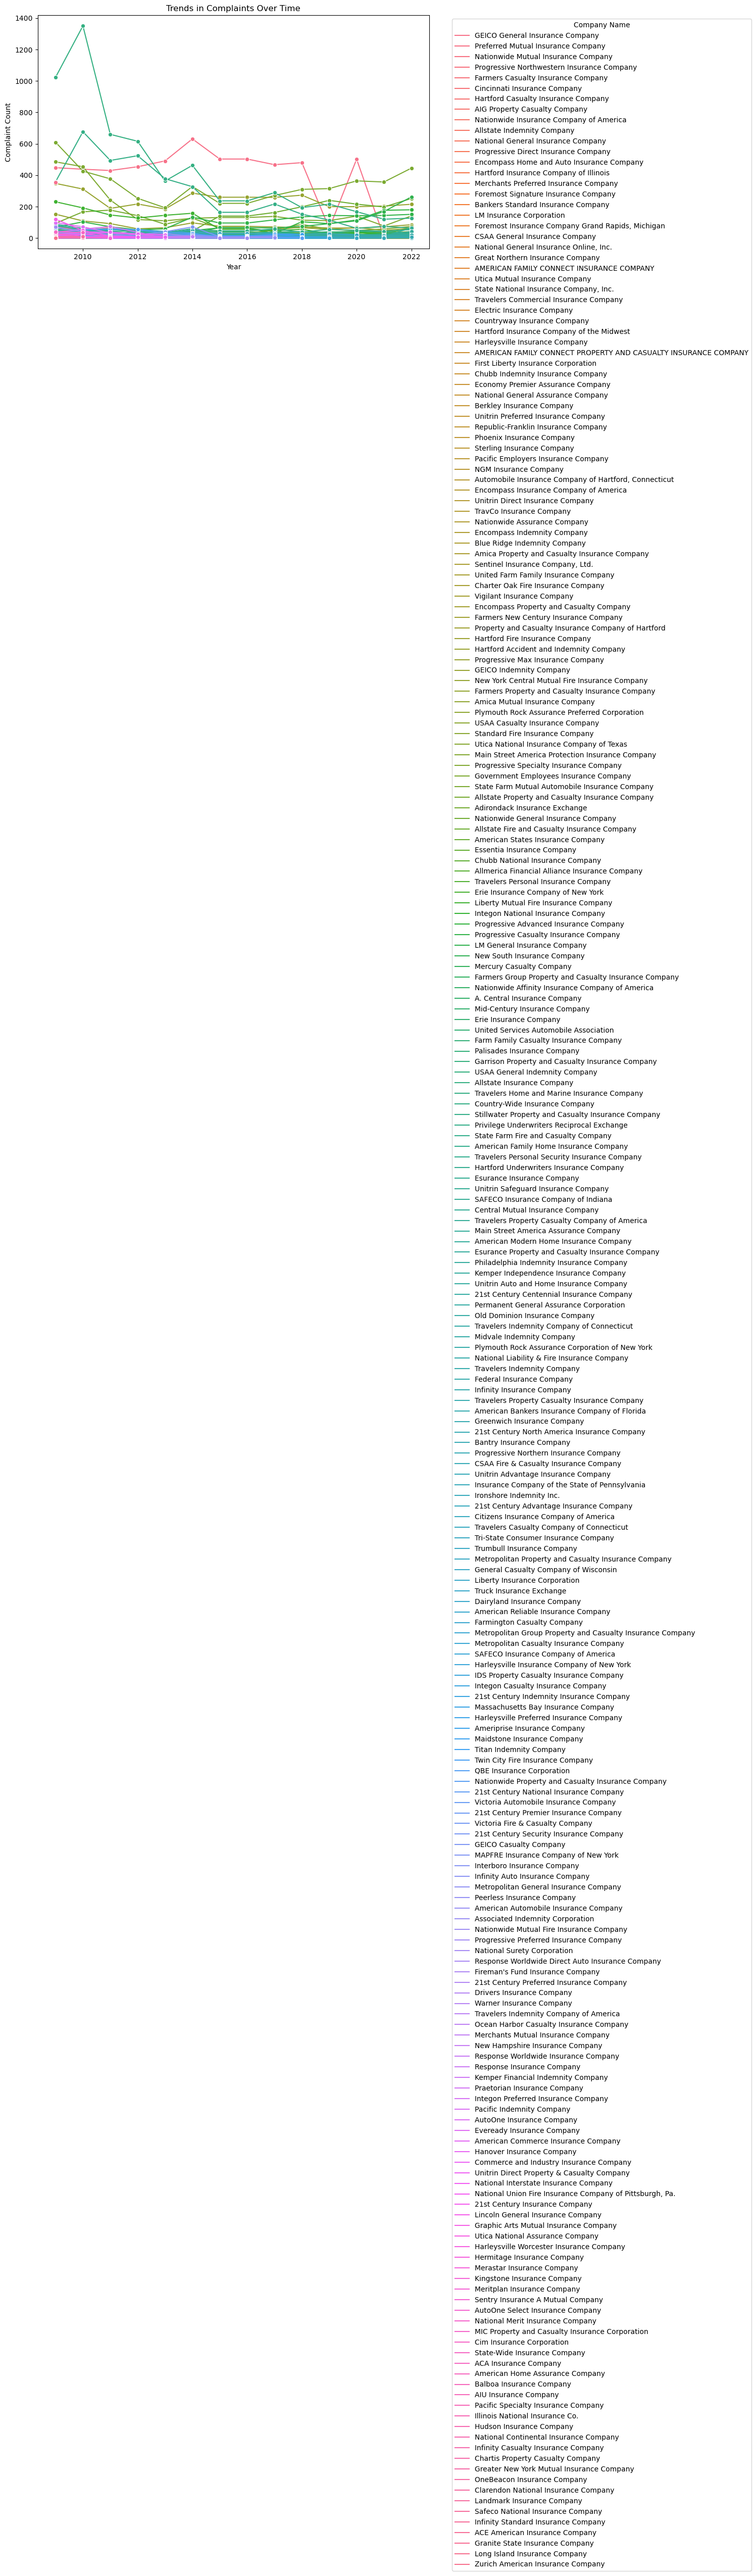

In [9]:
# Visualize complaints over years
if 'Filing Year' in insurance_data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=insurance_data, x='Filing Year', y='Total Complaints', hue='Company Name', marker="o")
    plt.title('Trends in Complaints Over Time')
    plt.xlabel('Year')
    plt.ylabel('Complaint Count')
    plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Scatter Plot: Complaint Volume vs. Premium Written(in Millions)

In [15]:

# Scatter Plot: Complaint Volume vs. Premium Written(in Millions)
fig = px.scatter(insurance_data, x='Premiums Written (in Millions)', y='Total Complaints', title='Complaint Volume vs. Premium Written(in Millions)',
                 labels={'Premium Written(in Millions)': 'Premium Written(in Millions)', 'Complaints': 'Complaint Count'},
                 hover_name='Company Name', hover_data={'Total Complaints': True, 'Premiums Written (in Millions)': True})

# Show plot
fig.show()


**Oberservations**:
Positive Correlation: There exists a broad upward trend, suggesting that businesses with greater premiums written are more likely to receive increased complaints. This is logical since larger firms catering to a greater number of clients will inevitably face more grievances.

Outliers: Several companies are notable for having a large volume of complaints compared to their premiums written, suggesting potential problems with customer service, policy conditions, or specific industry practices related to these firms.

Compact Group of Minor Firms: Most data points (minor firms) are grouped in the bottom left, showing comparatively low premiums and complaint totals, suggesting that minor firms typically receive fewer complaints in total.

**Insights**: The favorable connection indicates that as a company's size grows, complaint volume tends to rise, which may also point to distinct customer service issues faced by larger firms. Outliers might require additional scrutiny, as they may uncover certain elements that increase complaints, even among firms with comparable premiums written.

### Line plot: Total Complaints per year

In [16]:
import plotly.express as px


# First, let's group by year to get the sum of total complaints for each year
complaints_by_year = insurance_data.groupby('Filing Year')['Total Complaints'].sum().reset_index()

# Create a line plot
fig = px.line(complaints_by_year, x='Filing Year', y='Total Complaints',
              title='Total Complaints Over Time',
              labels={'Filing Year': 'Year', 'Total Complaints': 'Complaint Count'})

# Show plot
fig.show()


**Key obeservations**:

There is a significant decrease in complaints from approximately 2009 to 2015. This might suggest enhanced industry practices, superior customer service, or more efficient regulatory actions during this timeframe.

Following 2015, complaints vary, showing minor peaks and valleys. This might indicate market trends, alterations in products or policies, or outside influences impacting customer satisfaction.

The information shows a decline in complaints around 2020, likely attributable to unique factors such as the COVID-19 pandemic, which may have influenced customer behaviors or the ways complaints were managed.

**Insights**: This pattern indicates a general enhancement in complaint handling or customer contentment from 2009 to approximately 2020, with a degree of stabilization in complaints in the past few years. The recent variations suggest that complaints continue to be a regular problem and might need consistent focus from businesses to keep their levels low.

In [18]:
# Preparing data for a stacked bar chart showing different types of complaints
complaint_types = insurance_data[['Company Name', 'Upheld Complaints', 'Question of Fact Complaints', 'Not Upheld Complaints']]
complaint_types = complaint_types.set_index('Company Name')

# Plot stacked bar chart
fig = px.bar(complaint_types, title='Distribution of Complaint Types by Company',
             labels={'value': 'Complaint Count', 'variable': 'Complaint Type'})

# Show plot
fig.show()


As We cannot understand from previous plot we can focus on the top 20 companies with the most complaints

In [19]:
# Sort the data to focus on companies with the most complaints
top_companies = insurance_data.nlargest(20, 'Total Complaints')

# Restructure the data for a stacked bar chart, focusing on the top 20 companies by complaint volume
complaint_types = top_companies[['Company Name', 'Upheld Complaints', 'Question of Fact Complaints', 'Not Upheld Complaints']]
complaint_types = complaint_types.set_index('Company Name')

# Create a stacked bar chart
fig = px.bar(complaint_types, title='Distribution of Complaint Types for Top 20 Companies by Total Complaints',
             labels={'value': 'Complaint Count', 'variable': 'Complaint Type'})

# Adjust layout for better readability
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, width=1000, height=600)

# Show plot
fig.show()
